# Classifying MNIST dataset



MNIST database is a good example of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

The MNIST dataset & more information about it is at: http://yann.lecun.com/exdb/mnist/. It consists of the following four parts:
* Training set images: train-images-idx3-ubyte.gz
* Training set labels: train-labels-idx1-ubyte.gz
* Test set images: t10k-images-idx3-ubyte.gz
* Test set labels: t10k-labels-idx1-ubyte.gz



### Build a Two layer neural network classifier


### Questions: 
What train/validation split did you use ? 
What was the accuracy ?
What can you do to improve it ?

### Downloading and loading training data
1. Download using curl or whatever you like
2. Unzip it
3. load using machine learning extension package (mlxtend)

In [1]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!gunzip t*-ubyte.gz -f


from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')








<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>404 Not Found</title>
</head><body>
<h1>Not Found</h1>
<p>The requested URL was not found on this server.</p>
<hr>
<address>Apache/2.4.18 (Ubuntu) Server at yann.lecun.com Port 80</address>
</body></html>
gunzip: stat gave different size: 276 != 0 (leaving original)


### Explore what's in the data


Dimensions: 60000 x 784


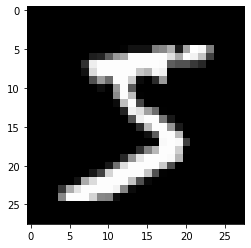

5


In [3]:
import numpy as np
import matplotlib.pyplot as plt


# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

#X contains image 
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
#print('\n1st row', X[0])
first_image = np.array(X[0], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#y contains labels
print(y[0])


In [4]:
# Split train/validation; 
randP = np.random.permutation(60000)
trainIdx = randP[0:50000]
valIdx = randP[50001:]

In [5]:
X = X.reshape(60000, 784).astype(np.float32)/255
y = y.reshape(60000, 1).astype(np.int)
train_x = X[trainIdx,:]
train_y = y[trainIdx]
val_x = X[valIdx,:]
val_y = y[valIdx,:]

In [6]:
# converting training images into torch format
train_x  = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)
val_x = torch.from_numpy(val_x)
val_y = torch.from_numpy(val_y)

In [7]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.linear_layers = Sequential(
            Linear(784, 784),
            ReLU(),
            Linear(784, 10),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.linear_layers(x)
        #x = torch.nn.functional.log_softmax(x, dim=1)
        return x

In [8]:
# defining the model
model = Net()

# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.01)

# defining the loss function
criterion = CrossEntropyLoss()

print(model)

Net(
  (linear_layers): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=10, bias=True)
  )
)


In [9]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    x_val, y_val = Variable(val_x), Variable(val_y)

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)
    
    # Set the y dimensions correctly
    y_train = y_train.squeeze(1).long()
    y_val = y_val.squeeze(1).long()

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train)
    loss_val = criterion(output_val, y_val)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [10]:
# defining the number of epochs
n_epochs = 25

# empty list to store training losses
train_losses = []
val_losses = []

# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.3035, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(1.5625, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(0.7811, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(0.6104, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(0.4566, grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(0.4480, grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(0.3273, grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(0.3188, grad_fn=<NllLossBackward>)
Epoch :  17 	 loss : tensor(0.2981, grad_fn=<NllLossBackward>)
Epoch :  19 	 loss : tensor(0.2527, grad_fn=<NllLossBackward>)
Epoch :  21 	 loss : tensor(0.2321, grad_fn=<NllLossBackward>)
Epoch :  23 	 loss : tensor(0.2206, grad_fn=<NllLossBackward>)
Epoch :  25 	 loss : tensor(0.2050, grad_fn=<NllLossBackward>)


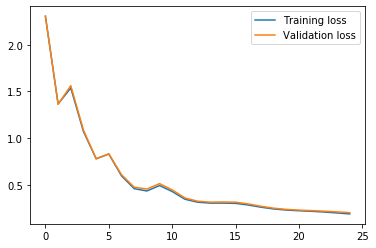

In [11]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [11]:
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx3-ubyte.gz
!gunzip t*-ubyte.gz -f

X_test, y_test = loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte', 
        labels_path='t10k-labels-idx3-ubyte')



<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>404 Not Found</title>
</head><body>
<h1>Not Found</h1>
<p>The requested URL was not found on this server.</p>
<hr>
<address>Apache/2.4.18 (Ubuntu) Server at yann.lecun.com Port 80</address>
</body></html>
gunzip: stat gave different size: 276 != 0 (leaving original)


FileNotFoundError: [Errno 2] No such file or directory: 't10k-labels-idx3-ubyte'